### HIERARCHICAL CLUSTERING
##Divisive
Start with all observations in one cluster and split the clusters sequencially
##Agglomerative
Start with as many cluster as observations and group them acoording...

In [109]:
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [0]:
import pandas as pd
x1 = mpg[['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year']]
y1 = mpg['origin']

x=pd.DataFrame(x1)
y=pd.DataFrame(y1)

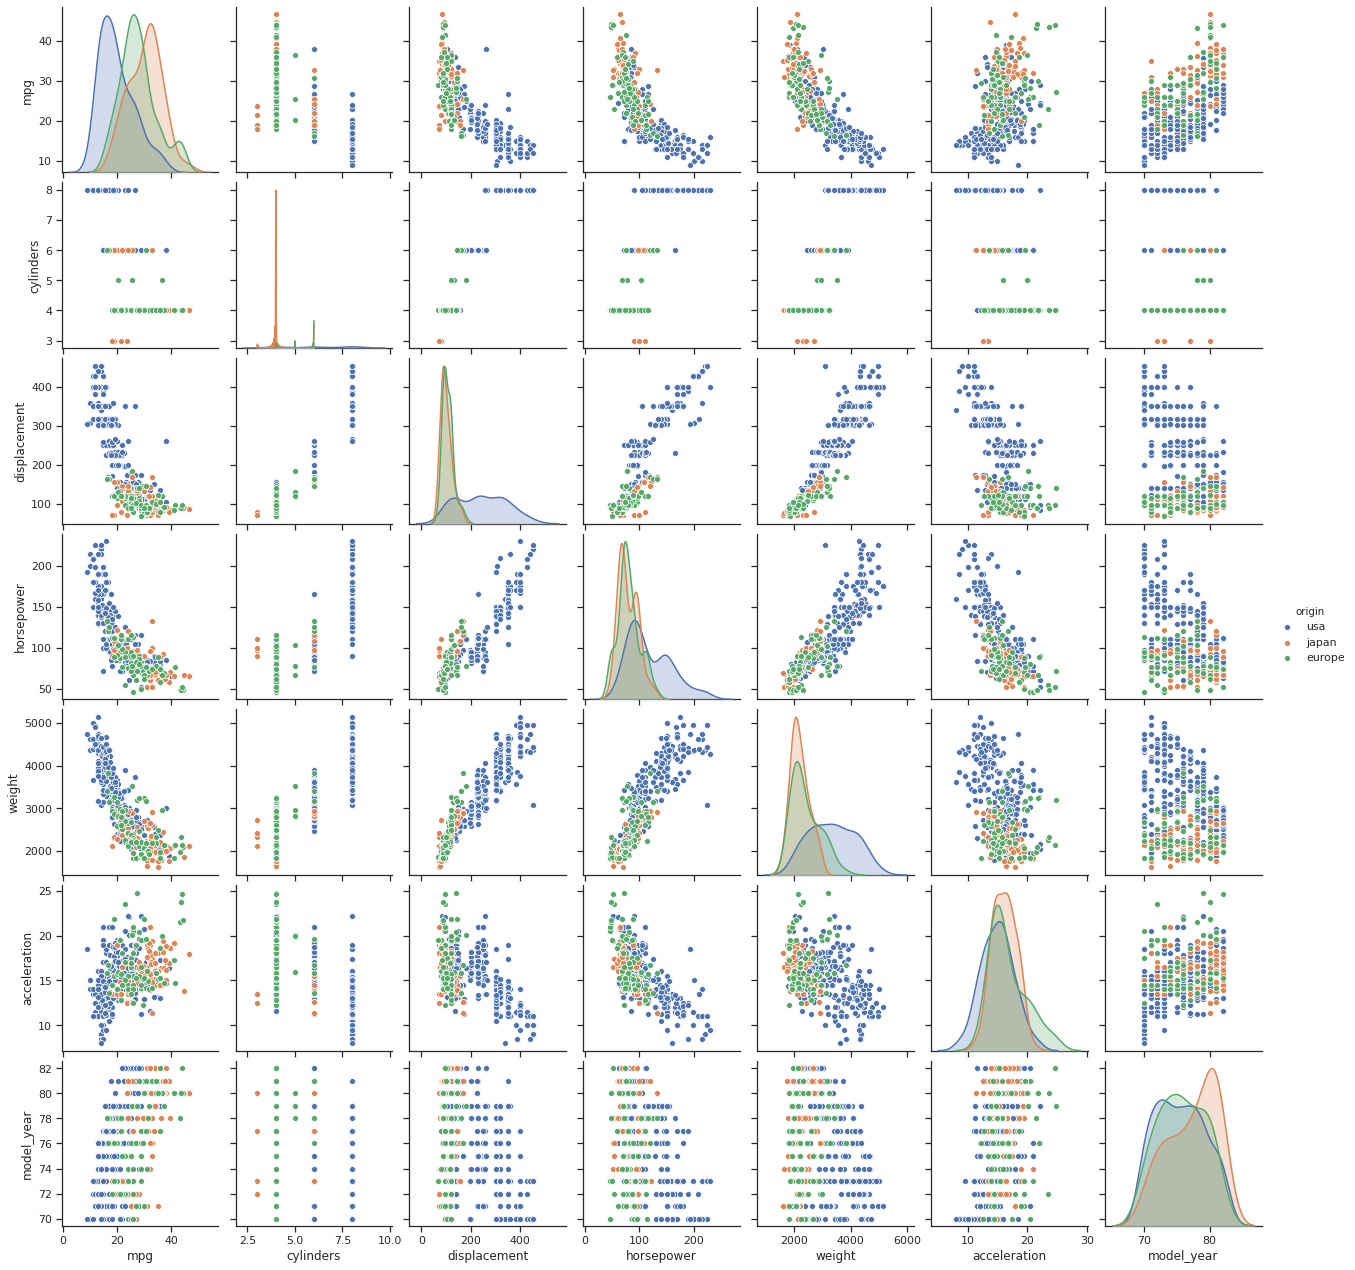

In [111]:
g = sns.pairplot(mpg,hue="origin")

In [112]:
x_na = x.dropna()
print("Shape sin Nans {}, shape con Nans {}".format(x_na.shape,x.shape))

Shape sin Nans (392, 7), shape con Nans (398, 7)


In [113]:
from sklearn.cluster import AgglomerativeClustering as ac
ac_mpg = ac(n_clusters=3).fit(x_na)
print('Etiquetas de asignacion a clusters {}'.format(ac_mpg.labels_))


Etiquetas de asignacion a clusters [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 1 1 1 2 1 0 0 0 0 2 2 2 1 0 0 1 1
 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 2 1 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 0 0 0 0 1 2 1 1 2
 2 1 2 0 0 2 2 1 1 0 1 1 0 1 1 0 2 1 2 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 1
 1 2 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 2 2
 0 0 0 0 1 0 1 1 2 2 2 2 0 0 0 1 2 2 2 1 1 0 1 1 0 0 0 0 0 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 1 2 1 2 2 2 2 1 1 1 2 2 2 2 2 0 0 0 0 1 1 1 0 1 0 1 0
 0 0 0 1 0 2 1 2 2 1 1 1 1 1 1 1 0 2 2 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 1 0
 0 1 0 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 0 2 1 1 1 2 2 1 2 2 1 1 1 2 2 2 1 1 1
 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 2 2 1 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


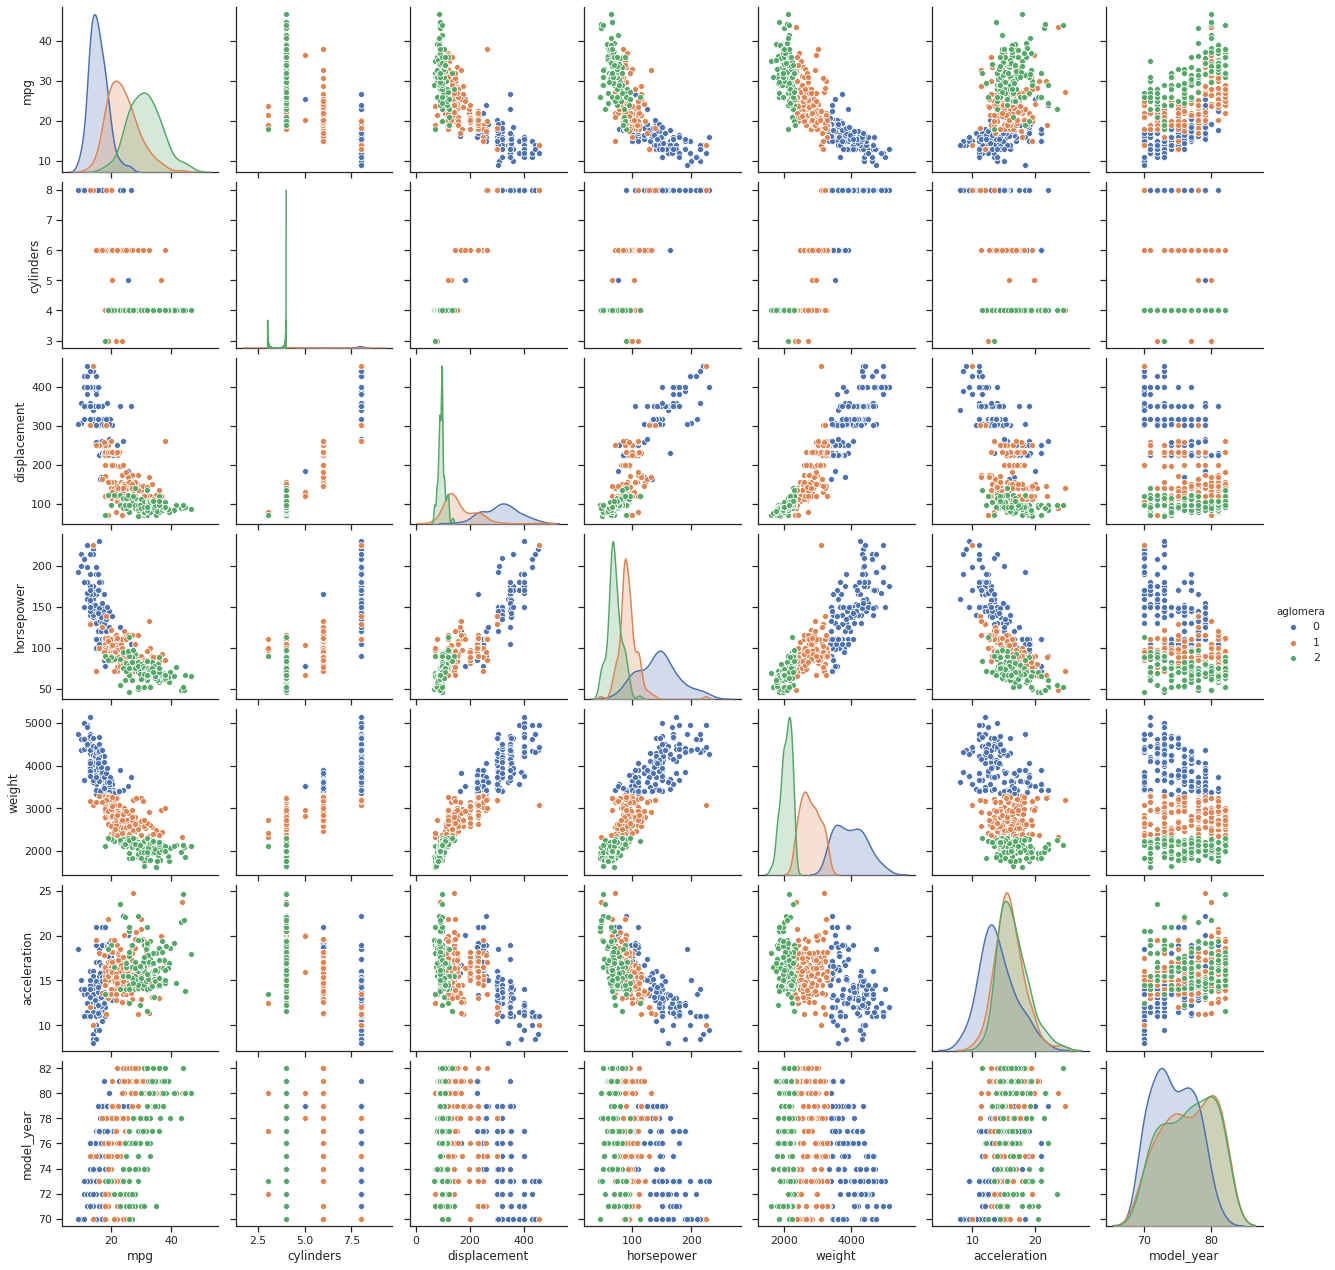

In [114]:
import pandas as pd
mpg_na = mpg.dropna()
mpg_grouped = mpg_na
mpg_grouped['aglomera']= ac_mpg.labels_
g= sns.pairplot(mpg_grouped, hue='aglomera')

### Make Blobs

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

n_samples = 1000
centers = [(0,0),(2,-5)]
random_state = 170

# Clusteres normales:
X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)

# Raros
#X_filtered = np.vstack((X[y == 0][:750], X[ y == 0][:250]))

transformation = [[0.20834549, -0.33667341], [-0.40887718, -0.85253229]]
X_aniso = np.dot(X, transformation)



In [0]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

Y_kmean = KMeans(n_clusters=2).fit_predict(X_aniso)
Y_agglo = AgglomerativeClustering(n_clusters=2).fit_predict(X_aniso)

In [258]:
print("Hay {} puntos distintos".format(np.sum(Y_kmean - Y_agglo)))

Hay 17 puntos distintos


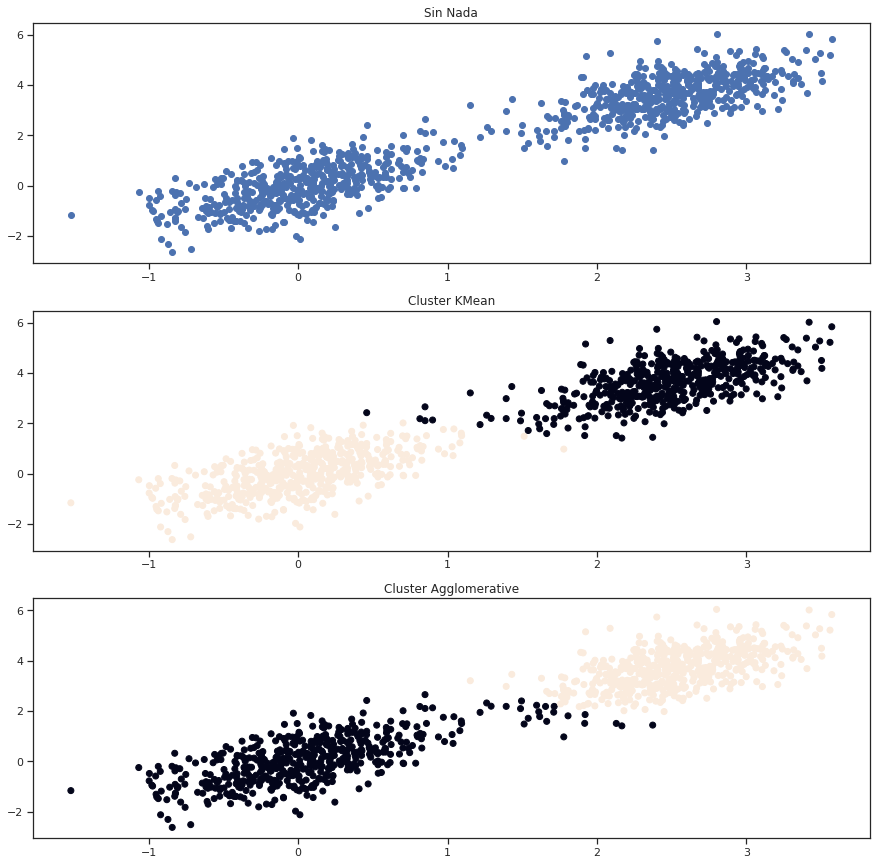

In [259]:
plt.figure(figsize=(15, 15))

plt.subplot(311)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1])
plt.title("Sin Nada")

plt.subplot(312)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1],c=Y_kmean)
plt.title("Cluster KMean")

plt.subplot(313)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1],c=Y_agglo)
plt.title("Cluster Agglomerative")

plt.show()

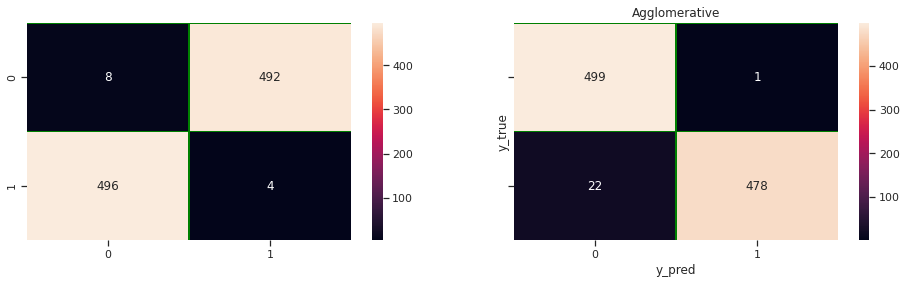

In [260]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm1 = confusion_matrix(y, Y_kmean)
cm2 = confusion_matrix(y, Y_agglo)

fig, ax = plt.subplots(1, 2, figsize=(16, 4),sharey=True)

sns.heatmap(cm1,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[0])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Kmeans')

sns.heatmap(cm2,annot = True,linewidths=0.5,linecolor="green",fmt = ".0f",ax=ax[1])
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title('Agglomerative')

plt.show()